In [1]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g


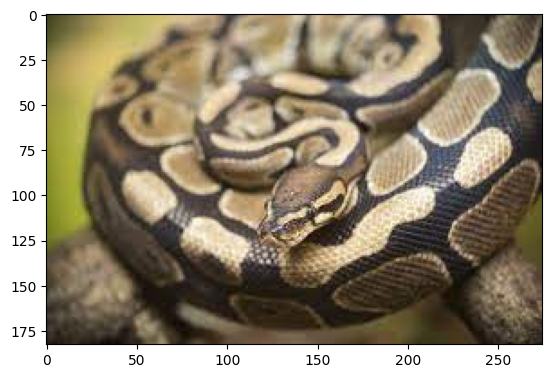

In [2]:
rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# GPU 1D

In [3]:
# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
blockSize = 1024
gridSize = int(pixel_count / blockSize)

In [4]:
rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
rgb_flat_1.shape

(50325, 3)

In [5]:
blocks = [2,4,8,16,32,64,128,256,512]
times = []

In [6]:
for b in blocks:
  start_time_gpu = time.time()
  devSrc = cuda.to_device(rgb_flat_1)
  devDst = cuda.device_array((pixel_count, 3), np.uint8)
  grayscale[gridSize, b](devSrc, devDst)
  hostDst = devDst.copy_to_host()
  gpu_time = time.time() - start_time_gpu
  times.append(gpu_time)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 49 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [7]:
devSrc = cuda.to_device(rgb_flat_1)
devDst = cuda.device_array((pixel_count, 3), np.uint8)
grayscale[gridSize, blockSize](devSrc, devDst)
hostDst = devDst.copy_to_host()
gpu_time = time.time() - start_time_gpu

In [8]:
new_image = hostDst.reshape(imageWidth, imageHeight, 3)

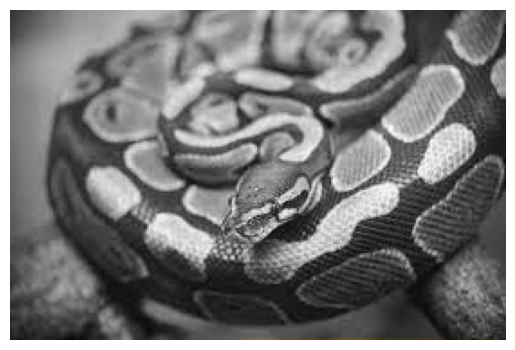

In [9]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [10]:
times

[0.6803395748138428,
 0.0016813278198242188,
 0.0014431476593017578,
 0.0009851455688476562,
 0.0006716251373291016,
 0.0015435218811035156,
 0.000782012939453125,
 0.000698089599609375,
 0.0006260871887207031]

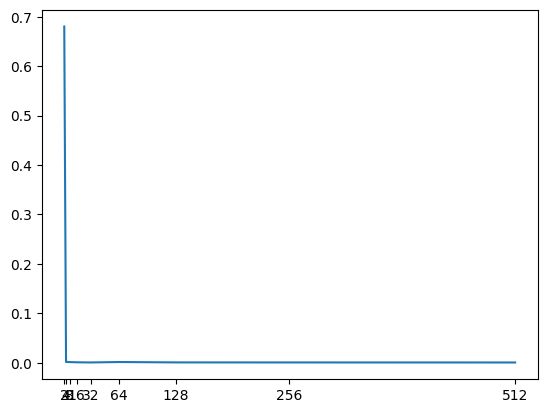

In [11]:
plt.plot(blocks, times)
plt.xticks(blocks)
plt.show()

# GPU 2D

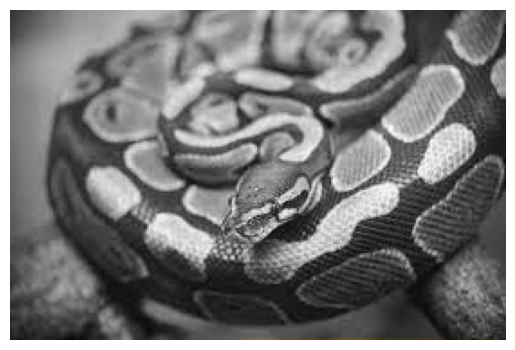

In [12]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    g = np.uint8((src[tidx, 0] + src[tidx, 1] + src[tidx, 2]) / 3)
    dst[tidx, 0] = dst[tidx, 1] = dst[tidx, 2] = g

rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
blockSize = 1024
gridSize = int(pixel_count / blockSize)

rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
rgb_flat_1.shape

devSrc = cuda.to_device(rgb_flat_1)
devDst = cuda.device_array((pixel_count, 3), np.uint8)
grayscale[gridSize, blockSize](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()

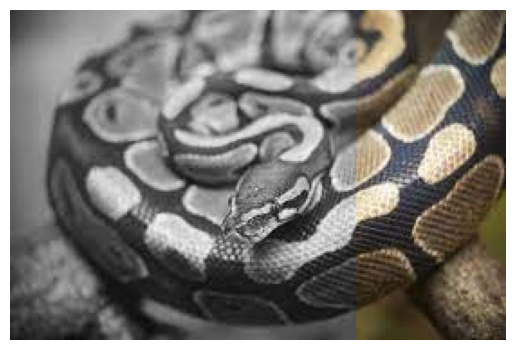

In [16]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # Get the 2D coordinates of the thread in the grid
    row, col = cuda.grid(2)

    if row < src.shape[0] and col < src.shape[1]:
        g = np.uint8((src[row, col, 0] + src[row, col, 1] + src[row, col, 2]) / 3)
        dst[row, col, 0] = dst[row, col, 1] = dst[row, col, 2] = g

rgb_image = imread('python.jpg')
plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Get the image dimensions
imageWidth, imageHeight, _ = rgb_image.shape

# Create a grid and block configuration
blockDim = (16, 16)  # 16x16 threads per block
gridDim = (imageHeight // blockDim[0] + 1, imageWidth // blockDim[1] + 1)

# Flatten the image into a 1D array of RGB
pixel_count = imageWidth * imageHeight
rgb_flat = rgb_image.reshape(imageWidth, imageHeight, 3)

devSrc = cuda.to_device(rgb_flat)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)

# Launch the kernel with the 2D grid and block configuration
grayscale[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 54 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


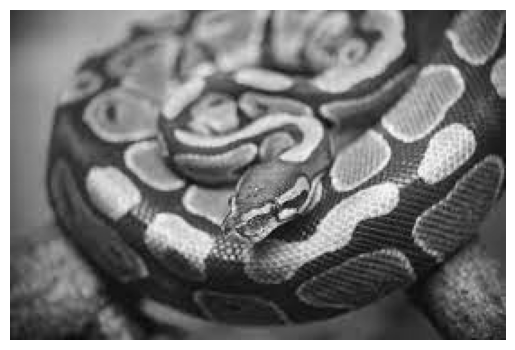

In [66]:
import numpy as np
import numba
from numba import cuda
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time

# Define a Numba CUDA kernel for grayscale conversion
@cuda.jit
def grayscale(src, dst):
    # where are we in the input?
    tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
    tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

    g = np.uint8((src[tidx, tidy, 0] + src[tidx, tidy, 1] + src[tidx, tidy, 2]) / 3)
    dst[tidx, tidy, 0] = dst[tidx, tidy, 1] = dst[tidx, tidy, 2] = g

# @cuda.jit
# def grayscale(src, dst):
#     # where are we in the input?
#     tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
#     tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

#     g = np.uint8((src[tidy, tidx, 0] + src[tidy, tidx, 1] + src[tidy, tidx, 2]) / 3)
#     dst[tidy, tidx, 0] = dst[tidy, tidx, 1] = dst[tidy, tidx, 2] = g

# rgb_image = imread('python.jpg')
# plt.imshow(rgb_image)

# Load an RGB image
rgb_image = imread('python.jpg')

# Flatten the image into a 1D array of RGB
imageWidth, imageHeight  = rgb_image.shape[0], rgb_image.shape[1]
pixel_count = imageWidth * imageHeight
# blockSize = 1024
# gridSize = int(pixel_count / blockSize)

gridSize = (8, 8)
blockSize = (32, 32)

blockDim = (32, 32)
gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

# rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
# rgb_flat_1.shape

devSrc = cuda.to_device(rgb_image)
devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)
# grayscale[gridSize, blockSize](devSrc, devDst)
grayscale[gridDim, blockDim](devSrc, devDst)
hostDst = devDst.copy_to_host()

new_image = hostDst.reshape(imageWidth, imageHeight, 3)

plt.imshow(new_image)
plt.axis('off')
plt.show()

# why does 32 gave weird image
# 64 give not fully grayscale
# this must be a rectangular

In [50]:
blockDim

(256, 286)

In [51]:
gridDim

(5, 5)

In [52]:
(imageWidth, imageHeight)

(1056, 1176)

In [75]:
blockS = [(2,2), (4,4), (8,8), (16,16), (32, 32)]
timeS = []

In [76]:
for b in blockS:

  start_time_gpu = time.time()
  blockDim = b
  gridDim = ((imageWidth // blockDim[0]) + 1, (imageHeight // blockDim[1]) + 1)

  # rgb_flat_1 = rgb_image.reshape(pixel_count, 3)
  # rgb_flat_1.shape

  devSrc = cuda.to_device(rgb_image)
  devDst = cuda.device_array((imageWidth, imageHeight, 3), np.uint8)
  # grayscale[gridSize, blockSize](devSrc, devDst)
  grayscale[gridDim, blockDim](devSrc, devDst)
  hostDst = devDst.copy_to_host()

  new_image = hostDst.reshape(imageWidth, imageHeight, 3)
  gpu_time = time.time() - start_time_gpu
  timeS.append(gpu_time)

In [77]:
timeS

[0.00241851806640625,
 0.0010306835174560547,
 0.0011587142944335938,
 0.0010194778442382812,
 0.00092315673828125]

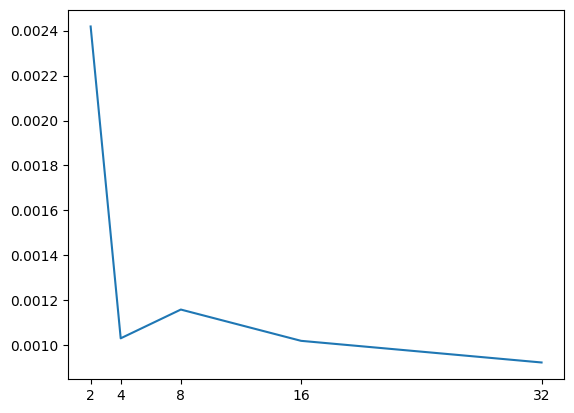

In [80]:
blockS1 = [2, 4, 8, 16, 32]
plt.plot(blockS1, timeS)
plt.xticks(blockS1)
plt.show()

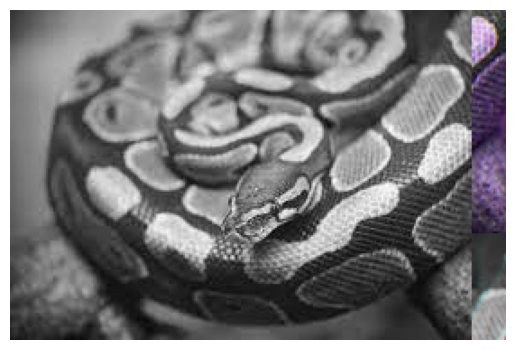

In [29]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

# CPU task

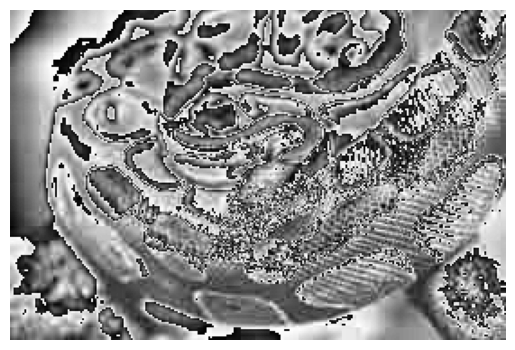

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread('python.jpg')
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

start_time = time.time()

# convert image to grayscale
gray_img = (red + green + blue)/3

cpu_time = time.time() - start_time

plt.imshow(gray_img, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.show()

In [14]:
cpu_time

0.0010628700256347656